In [1]:


import numpy as np                                         #运算
from sklearn.linear_model import LogisticRegression as LR  #导入逻辑回归的类
from sklearn.datasets import load_breast_cancer            #数据模块中导入乳腺癌函数
from sklearn.model_selection import train_test_split       #划分训练集和测试集合
from sklearn.metrics import accuracy_score                 #准确度
import matplotlib.pyplot as plt                            #绘图




In [2]:


data = load_breast_cancer()  #乳腺癌数据集
x = data.data                #特征
y = data.target              #标签
x.data.shape                 #样本数以及特征个数




(569, 30)

In [3]:
lrl1 = LR(penalty="l1", solver = 'liblinear', C=0.5, max_iter=1000)    #实例化逻辑回归，正则方式选择L1,C正则化强度的倒数为0.5
lrl2 = LR(penalty="l2", solver = 'liblinear', C=0.5, max_iter=1000)    #实例化逻辑回归，正则方式选择L2,C正则化强度的倒数为0.5


lrl1 = lrl1.fit(x,y)    #训练
#逻辑回归的属性coef_，返回每个特征所对应的系数
lrl1.coef_
(lrl1.coef_ != 0).sum()

10

In [4]:
lrl2 = lrl2.fit(x,y)
lrl2.coef_
(lrl2.coef_ != 0).sum()

30

In [5]:
[*zip(data.feature_names, lrl1.coef_.reshape(30,1))]

[('mean radius', array([4.00182027])),
 ('mean texture', array([0.03172644])),
 ('mean perimeter', array([-0.13735708])),
 ('mean area', array([-0.01621727])),
 ('mean smoothness', array([0.])),
 ('mean compactness', array([0.])),
 ('mean concavity', array([0.])),
 ('mean concave points', array([0.])),
 ('mean symmetry', array([0.])),
 ('mean fractal dimension', array([0.])),
 ('radius error', array([0.])),
 ('texture error', array([0.50367231])),
 ('perimeter error', array([0.])),
 ('area error', array([-0.07123627])),
 ('smoothness error', array([0.])),
 ('compactness error', array([0.])),
 ('concavity error', array([0.])),
 ('concave points error', array([0.])),
 ('symmetry error', array([0.])),
 ('fractal dimension error', array([0.])),
 ('worst radius', array([0.])),
 ('worst texture', array([-0.2456283])),
 ('worst perimeter', array([-0.12850858])),
 ('worst area', array([-0.0144171])),
 ('worst smoothness', array([0.])),
 ('worst compactness', array([0.])),
 ('worst concavity', 

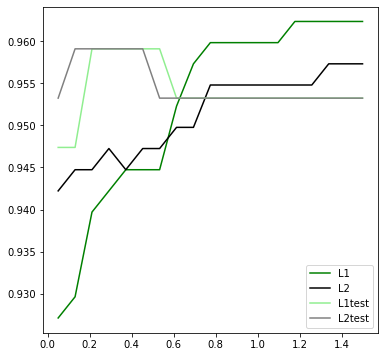

In [6]:

#绘制不同C（对损失函数的惩罚程度）对逻辑回归的精度影响

l1 = []
l2 = []
l1test = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=1912)
 
for i in np.linspace(0.05,1.5,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]    
 
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1.5,19),graph[i],color[i],label=label[i])
plt.legend(loc=4) #loc指定了图例的位置，=4时位于右下角
plt.show()





## 梯度下降

C:\Users\boc\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\boc\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\boc\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


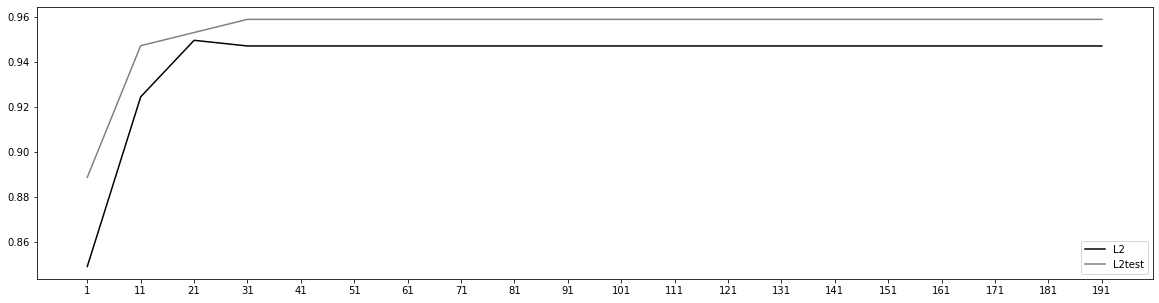

C:\Users\boc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([300])

In [10]:

#max_iter的学习曲线

l2 = []
l2test = []
 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=1912)
 
for i in np.arange(1,201,10):
    lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph = [l2,l2test]
color = ["black","gray"]
label = ["L2","L2test"]
    
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.xticks(np.arange(1,201,10))
plt.show()
 
#逻辑回归的属性n_iter_可以返回求解中真正实现的迭代次数
 
lr = LR(penalty="l2",C=0.5,max_iter=300).fit(Xtrain,Ytrain)
lr.n_iter_  


## 混淆矩阵

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve as prc

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3,random_state=1912)
lrl2 = LR(penalty="l2",solver="liblinear",C=.5,max_iter=1000).fit(Xtrain, Ytrain)

In [14]:
cm = confusion_matrix(Ytest, lrl2.predict(Xtest))
cm

array([[ 60,   5],
       [  2, 104]], dtype=int64)

In [15]:
tn, fp, fn, tp = cm.ravel()

In [16]:
tn, fp, fn, tp 

(60, 5, 2, 104)

In [17]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = tp/(tp+fn)
# Specificity or true negative rate
TNR = tn/(tn+fp) 
# Precision or positive predictive value
PPV = tp/(tp+fp)
# Negative predictive value
NPV = tn/(tn+fn)
# Fall out or false positive rate
FPR = fp/(fp+tn)
# False negative rate
FNR = fn/(tp+fn)
# False discovery rate
FDR = fp/(tp+fp)

precision = tp / (tp+fp)  # 查准率
recall = tp / (tp+fn)  # 查全率

In [18]:
precision

0.9541284403669725

In [19]:
recall

0.9811320754716981

In [20]:
roc_auc_score(Ytest, lrl2.predict(Xtest))

0.9521044992743106

In [21]:
accuracy_score(Ytest, lrl2.predict(Xtest))

0.9590643274853801